## Libraries

First, you need to install the following librairies:
- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for creating the plot
- `pandas` for data manipulation
- `numpy` for data generation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Dataset

We use `np.random.normal()` to create **normally distributed** data for `'Group A'` and `'Group B'`, but with different `means`.

In [2]:
# Generate data for Group A (Normal Distribution)
group_a = np.random.normal(loc=50, scale=10, size=100)

# Generate data for Group B (Skewed Distribution)
group_b = np.random.normal(loc=20, scale=10, size=100)

# Create a DataFrame
df = pd.DataFrame({'Group': ['Group A'] * 100 + ['Group B'] * 100,
                   'Value': np.concatenate((group_a, group_b))})

## Basic grouped boxplots with jitter

Once we've opened our dataset, we'll now **create the graph**. The following displays the **distribution** of both groups using the `boxplot()` function.

- Adding **individual data points**  with [matplotlib](https://python-graph-gallery.com/matplotlib/) is actually adding a [scatter plot](https://python-graph-gallery.com/scatter-plot/) on top of the main chart. 

- We need to specify the **maximum width** over which the points will be represented, and then generate their positions randomly, ideally **uniformly** (`np.random.uniform()`) for best visibility. However, this is perfectly **customizable**. 

- **Data Grouping**: Groups the data in a DataFrame `'df'` based on the `'Group'` column. Selects the `'Value'` column from each group, creating a series of grouped values.

- **Box Plot Creation**: Creates a [boxplot](https://python-graph-gallery.com/boxplot/) on the `'ax'` axes. Uses data from the grouped values to form the boxes. **Labels each box** with the unique group names from the `'Group'` column.

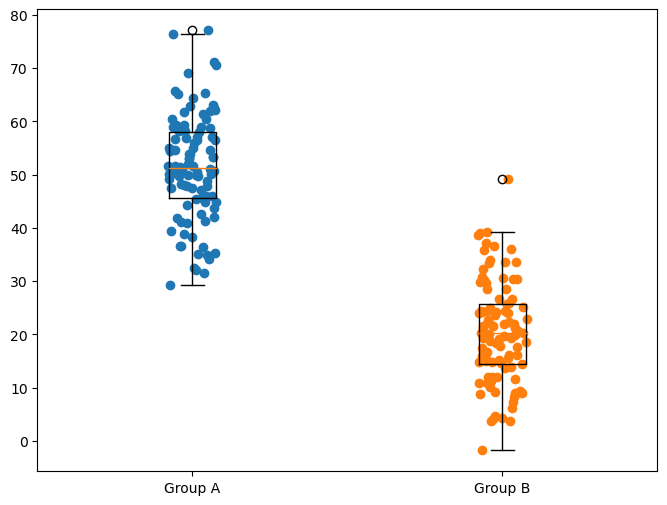

In [3]:
# Group our dataset with our 'Group' variable
grouped = df.groupby('Group')['Value']

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8,6))

# Create the plot
ax.boxplot(x=[group.values for name, group in grouped],
           labels=grouped.groups.keys())

# Add jittered points
lower_born = 0.92
higher_born = 1.08
positions = np.random.uniform(lower_born, higher_born,
                              size=len(df))

# Init the position of the first group
position = 0
for group in df['Group'].unique():
    
    # Define min and max width of data points (customizable)
    lower_born = position + 0.92
    higher_born = position + 1.08
    
    # Get the number of observation in the category
    size = len(df[df['Group']==group])
    
    # Define position of each observation
    positions = np.random.uniform(lower_born,
                                  higher_born,
                                  size=size)
    ax.scatter(positions,
               df[df['Group']==group]['Value'])
    
    # Shift the next group to one unit to the right
    position += 1

# Display it
plt.show()

## Custom markers

To make the graph more readable, we need to change several properties of our boxplots.

- size of the markers: `s` argument
- style of the markers: `marker` argument (must be in the following list: `o`, `s`, `d`, `^`, `v`, `<`, `>`, `p`, `*`, `+`, `x`, `h`, `1`, `2`, `3`, `4`)
- `color`
- `edgecolor`
- width of the edges: `linewidth` argument

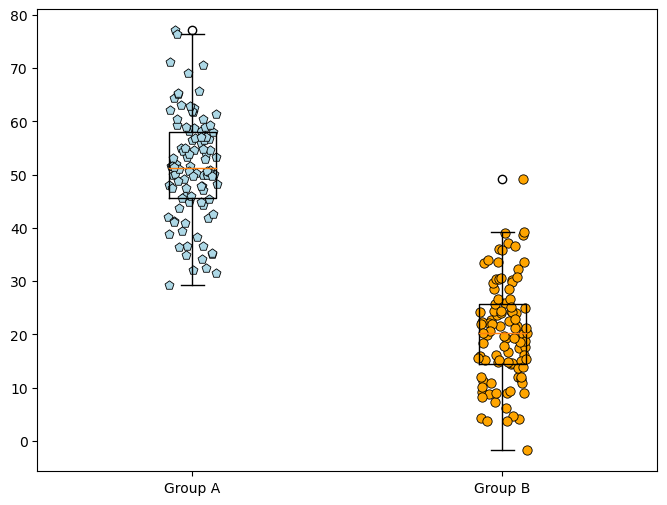

In [4]:
# Group our dataset with our 'Group' variable
grouped = df.groupby('Group')['Value']

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8,6))

# Create the plot
ax.boxplot(x=[group.values for name, group in grouped],
           labels=grouped.groups.keys())

# Add jittered points
lower_born = 0.92
higher_born = 1.08
positions = np.random.uniform(lower_born, higher_born,
                              size=len(df))


# Type of marker to use
markers = ['p', 'o']

# Colors
colors = ['lightblue', 'orange']

# Init the position of the first group
position = 0
for i, group in enumerate(df['Group'].unique()):
    
    # Define min and max width of data points (customizable)
    lower_born = position + 0.92
    higher_born = position + 1.08
    
    # Get the number of observation in the category
    size = len(df[df['Group']==group])
    
    # Define position of each observation
    positions = np.random.uniform(lower_born,
                                  higher_born,
                                  size=size)
    ax.scatter(positions,
               df[df['Group']==group]['Value'],
               marker=markers[i],
               s=45,
               edgecolor='black',
               linewidth=0.6,
               color=colors[i])
    
    # Shift the next group to one unit to the right
    position += 1

# Display it
plt.show()

## Flip the plot

In order to **flip the plot** on the other axis, we have to:
- add the `vert=False` argument in the `boxplot()` function
- switch the **first and the second** argument in the `scatter()` function

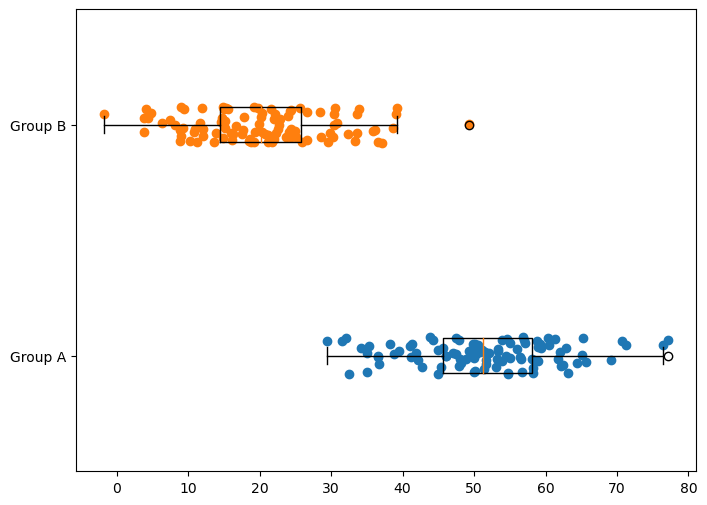

In [5]:
# Group our dataset with our 'Group' variable
grouped = df.groupby('Group')['Value']

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8,6))

# Create the plot
ax.boxplot(x=[group.values for name, group in grouped],
           labels=grouped.groups.keys(),
           vert=False)

# Add jittered points
lower_born = 0.92
higher_born = 1.08
positions = np.random.uniform(lower_born, higher_born,
                              size=len(df))

# Init the position of the first group
position = 0
for group in df['Group'].unique():
    
    # Define min and max width of data points (customizable)
    lower_born = position + 0.92
    higher_born = position + 1.08
    
    # Get the number of observation in the category
    size = len(df[df['Group']==group])
    
    # Define position of each observation
    positions = np.random.uniform(lower_born,
                                  higher_born,
                                  size=size)
    ax.scatter(df[df['Group']==group]['Value'],
               positions)
    
    # Shift the next group to one unit to the right
    position += 1

# Display it
plt.show()

## Going further

This post explains how to create a grouped boxplot with jitter using [matplotlib](https://python-graph-gallery.com/matplotlib/).

For more examples of **how to create or customize** your boxplots, see the [boxplot section](https://python-graph-gallery.com/boxplot/). You may also be interested in how to [combine a boxplot and a beeswarmplot](https://python-graph-gallery.com/509-introduction-to-swarm-plot-in-matplotlib/).